# Iris FunTime with Python!

### Let's check out the widely-used [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).  We'll do some cleaning, troubleshooting, and analyzing.  

First, let's import some usual suspects:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# from sklearn import linear_model, datasets  ## sklearn.datasets contains famous datasets
from sklearn import datasets

%matplotlib inline

In [13]:
iris_dataset = datasets.load_iris() ## this loading feature is unique to sklearn.datasets
type(iris_dataset)

sklearn.datasets.base.Bunch

In [14]:
iris = iris_dataset.data ## the feature data
iris_features = iris_dataset.feature_names ## feature (column) names
iris_target = iris_dataset.target ## target data
iris_target_names = iris_dataset.target_names

print 'data: %s' %type(iris), '\n', \
    'target: %s' %type(iris_features), '\n', \
    'target_names: %s' %type(iris_target)

data: <type 'numpy.ndarray'> 
target: <type 'list'> 
target_names: <type 'numpy.ndarray'>


Let's see what these species look like IRL while learning how to load an image from URL:

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 

In [16]:
print 'Iris setosa:'
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/5/56/\
Kosaciec_szczecinkowaty_Iris_setosa.jpg', width=250)

Iris setosa:


In [17]:
print 'Iris versicolor:'
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg', \
     width = 350)

Iris versicolor:


In [18]:
name = 'virginica'
print 'Iris %s:' %name
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg', \
     width = 450)

Iris virginica:


The image below is rendered in markdown (click on it to see the code):

![]("assets/Iris_virginica.png" x100)

Let's check out the dataset:

In [19]:
iris[0:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [20]:
iris[4][0]

5.0

In [21]:
iris[0][4]

IndexError: index 4 is out of bounds for axis 0 with size 4

In [22]:
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
df = pd.DataFrame(iris)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let's try to add the designated target column to the dataframe:

In [24]:
df['species'] = iris.target
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'target'

Oh oh, that doesn't work.  If you get an error like this, look where you tried to call the second part (the attribute) and fix that object; in our case, 'iris' was not the one we should've been using.  It should be 'iris_dataset' (two cells down).

In [25]:
iris_target_names ## we created this earlier

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [26]:
list(iris_target_names)

['setosa', 'versicolor', 'virginica']

In [27]:
df.columns = iris_features
df['target'] = iris_dataset.target
df['species'] = df['target'].apply(lambda x: iris_target_names[x]) #bc ^ names are ordered 0,1,2
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


Those feature column names are a little long, let's edit!

In [28]:
feature_dict = {
    'sepal length (cm)' : 'sepal_L',
    'sepal width (cm)' : 'sepal_W',
    'petal length (cm)' : 'petal_L',
    'petal width (cm)' : 'petal_W'
}

df = df.rename(columns = feature_dict)
df.head(2)

,sepal_L,sepal_W,petal_L,petal_W,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [29]:
df.isnull().sum()

sepal_L    0
sepal_W    0
petal_L    0
petal_W    0
target     0
species    0
dtype: int64

In [30]:
df.dtypes

sepal_L    float64
sepal_W    float64
petal_L    float64
petal_W    float64
target       int64
species     object
dtype: object

Can the 'target' column have datatype integer?

... Nope, because it's categorical!  But we're not going to use it anyway, so we won't bother changing it.  

In [31]:
df['sepal_L'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_L, dtype: float64

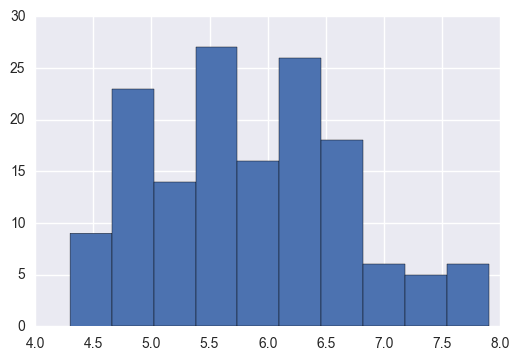

In [32]:
df['sepal_L'].hist()
plt.show()

Don't print out really long dataframes or method returns like this!  ...

In [33]:
df['sepal_L'].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
5.4     6
4.9     6
6.0     6
6.1     6
5.6     6
6.5     5
4.8     5
7.7     4
4.6     4
6.9     4
5.2     4
6.2     4
6.8     3
7.2     3
4.4     3
5.9     3
4.7     2
6.6     2
7.4     1
4.3     1
7.3     1
7.1     1
7.0     1
5.3     1
7.9     1
4.5     1
7.6     1
Name: sepal_L, dtype: int64

Let's reassign all sepal lengths of 5.0cm to 'B' just for fun:

In [35]:
df.loc[df['sepal_L'] == 5.0,['sepal_L']] = 4500

How many sepals length 4500 are there?

Let's count them two different ways:

In [36]:
df['sepal_L'].value_counts()[4500]

10

In [37]:
len(df[df['sepal_L'] == 4500])

10

In [38]:
df.loc[df['sepal_L'] == 4500, :].index

Int64Index([4, 7, 25, 26, 35, 40, 43, 49, 60, 93], dtype='int64')

In [39]:
df.loc[df['sepal_L'] == 4500, :][5:7]

,sepal_L,sepal_W,petal_L,petal_W,target,species
40,4500.0,3.5,1.3,0.3,0,setosa
43,4500.0,3.5,1.6,0.6,0,setosa


In [40]:
df.loc[df['sepal_L'] == 4500, ['sepal_W']][5:7]

,sepal_W
40,3.5
43,3.5


In [41]:
df.iloc[7:10, 2:]

,petal_L,petal_W,target,species
7,1.5,0.2,0,setosa
8,1.4,0.2,0,setosa
9,1.5,0.1,0,setosa


In [42]:
df[df['sepal_L'] == 4500]['sepal_L'] = 5.0

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


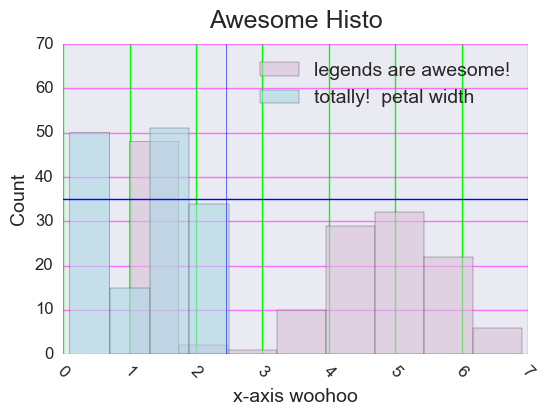

In [43]:
df['petal_L'].hist(bins = 8, label = 'legends are awesome!', alpha = 0.6, color = 'thistle')
df['petal_W'].hist(bins = 4, label = 'totally!  petal width', alpha = 0.6, color = 'lightblue')
plt.title('Awesome Histo', fontsize = 18, y = 1.03)

plt.xlim([0.0, 7])
plt.xticks(range(0, 8, 1), fontsize = 12, rotation = -45) # Ticks go from 0 - 7 by jumps of 1
plt.xlabel('x-axis woohoo', fontsize = 14)

plt.ylim([0, 70])
plt.yticks(np.arange(0, 80, 10), fontsize = 12)
plt.ylabel('Count', fontsize = 14)
plt.grid(which='major', axis = 'x', color = 'lime')
plt.grid(which='major', axis = 'y', color = 'magenta', alpha = 0.5)

plt.axvline(2.45, linewidth = 0.4)
plt.axhline(35, linewidth = 1)

plt.legend(loc = 'upper right', fontsize = 14)      #LEGENDS

plt.show()

In [ ]:
df['species'].value_counts()

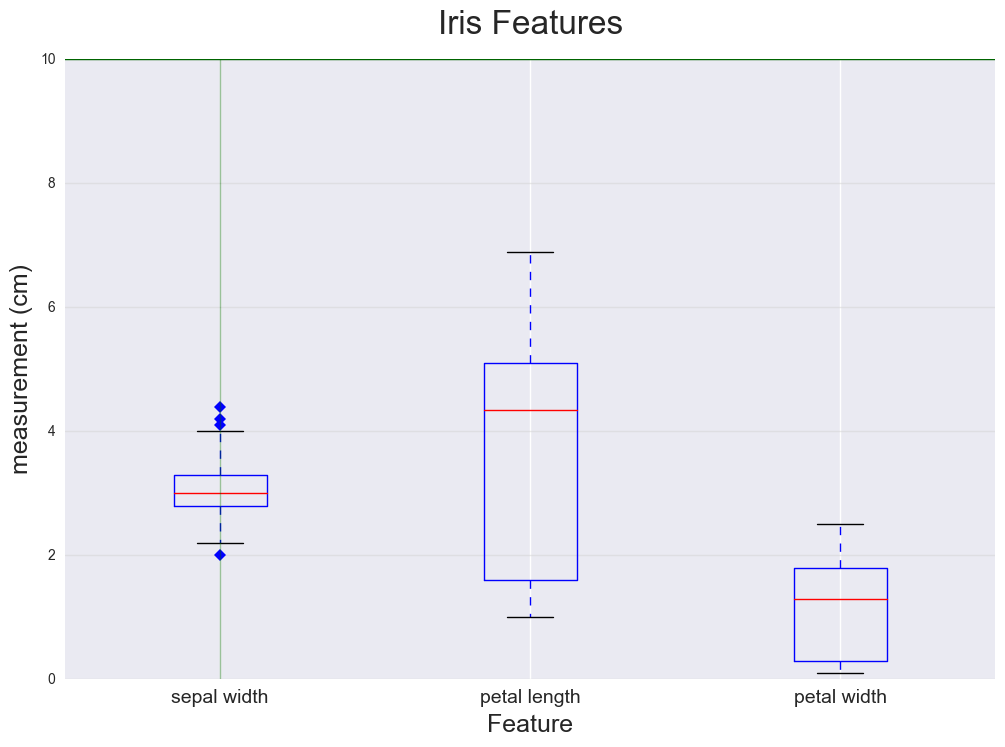

In [44]:
data = [df['sepal_W'], df['petal_L'], df['petal_W']]

fig, ax1 = plt.subplots(figsize=(12, 8))

plt.boxplot(data, 0, 'gD')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set_axisbelow(True)
ax1.set_title('Iris Features', y =1.03, fontsize = 24)
ax1.set_xlabel('Feature', fontsize = 18)
ax1.set_ylabel('measurement (cm)', fontsize = 18)

# Set the axes ranges and axes labels
numBoxes = 3                              #Set boxes
ax1.set_xlim(0.5, numBoxes + 0.5)         # + 0.5 sets space on sides
ax1.set_ylim(0, 10)                       # Set 
xtickNames = plt.setp(ax1, xticklabels=['sepal width', 'petal length', 'petal width'])
plt.setp(xtickNames, fontsize=14)

plt.axhline(10, color = 'darkgreen')
plt.axvline(1, color = 'darkgreen', linewidth = 1, alpha = 0.4)

plt.show()

In [45]:
df.head(2)

,sepal_L,sepal_W,petal_L,petal_W,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [46]:
df = df.drop('target', axis = 1)
df.head(2)

,sepal_L,sepal_W,petal_L,petal_W,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [49]:
big_df = pd.concat([df.drop('species', axis = 1), pd.get_dummies(df['species'])], axis = 1)
big_df.head(2)

,sepal_L,sepal_W,petal_L,petal_W,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0


Read more about try/except [here](https://docs.python.org/3/tutorial/errors.html).

In [50]:
try:
    del big_df['setosa']
except:
    pass

This is one of the scalers you can use; NB they're also built-in to some of the regression functions:

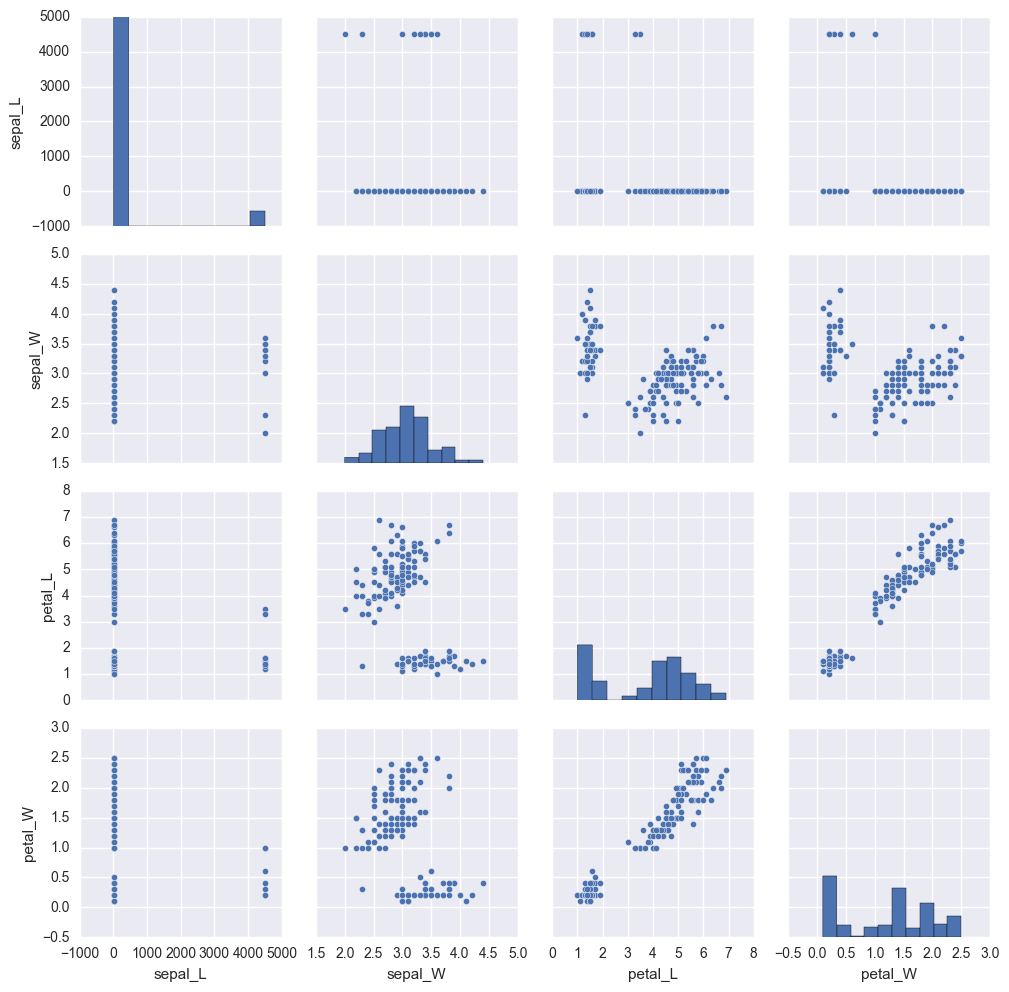

In [51]:
sns.pairplot(big_df.iloc[:,0:4])
plt.show()

Colormap reference [here](http://matplotlib.org/examples/color/colormaps_reference.html) (scroll down, too!).

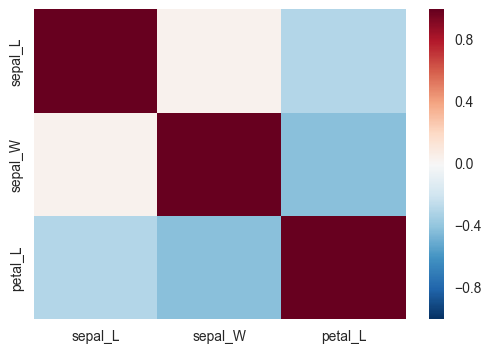

In [53]:
sns.heatmap(df.iloc[:,0:3].corr())
plt.show()

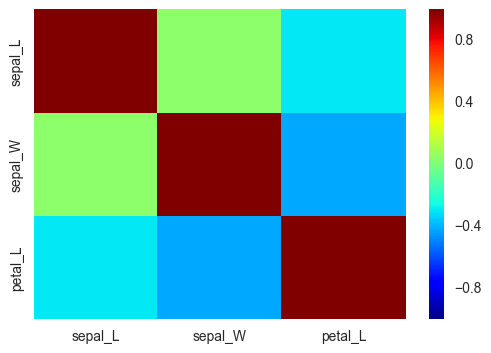

In [55]:
#Change colors on the correlation matrix

sns.heatmap(df.iloc[:,0:3].corr(), cmap= 'jet')
plt.show()

Set up a color mapping!

In [56]:
species_dict = {
    'setosa' : 'red',
    'virginica' : 'blue',
    'versicolor' : 'goldenrod'
}

colors = df['species'].apply(lambda x: species_dict[x])

In [59]:
df.loc[df['sepal_L'] == 4500,['sepal_L']] = 5.0

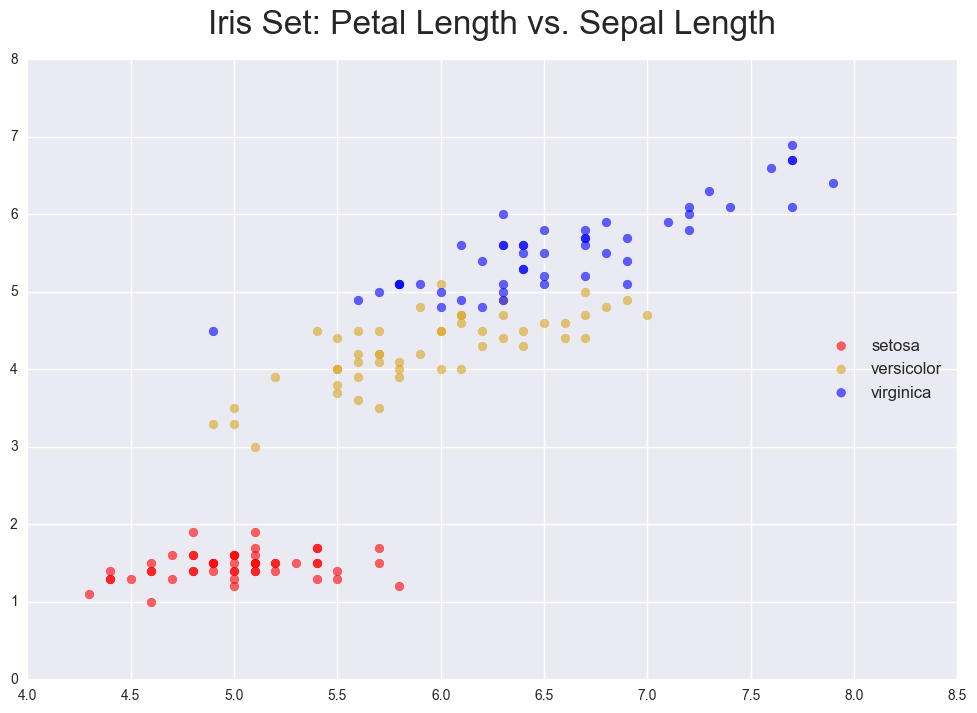

In [62]:
plt.figure(figsize=(12,8))

for name in iris_target_names:
    plt.scatter(df[df['species'] == name]['sepal_L'], df[df['species'] == name]['petal_L'], \
                color = species_dict[name], alpha = 0.6, s = 40, label = name)

plt.title('Iris Set: Petal Length vs. Sepal Length', fontsize = 24, y = 1.03)

# y 
# plt.ylabel('Actual Length (cm)', fontsize = 18)
# plt.yticks(np.arange(4.0, 9.0, 0.5), fontsize = 12)
# plt.xlim([4, 8.5])

# # x 
# plt.xlabel('Predicted Length (cm)', fontsize = 18)
# plt.xticks(np.arange(4.0, 9.0, 0.5), fontsize = 12)
# plt.ylim([4, 8.5])

# plt.plot([4, 8.5], [4, 8.5], '--', linewidth = 1, color = 'darkgreen', alpha = 0.6)

plt.legend(loc = 'center right', fontsize = 12)

plt.grid(True)

plt.show()

If you want to try jittering the points, there are helpful tips [here](http://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot).

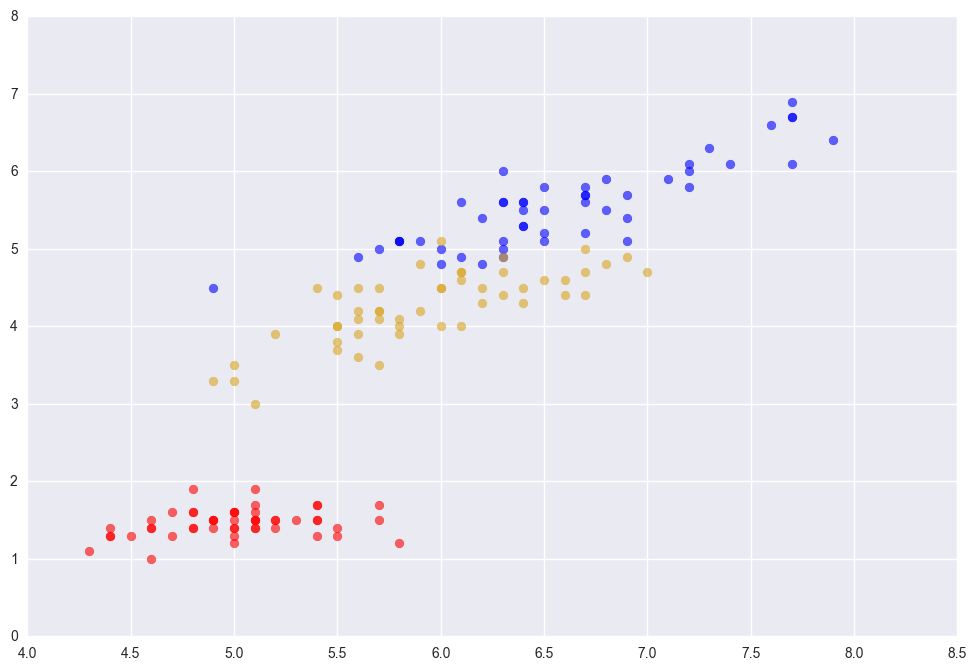

In [65]:
plt.figure(figsize=(12,8))

plt.scatter(df[df['species'] == 'setosa']['sepal_L'], df[df['species'] == 'setosa']['petal_L'], \
                color = species_dict['setosa'], alpha = 0.6, s = 40, label = 'setosa')

plt.scatter(df[df['species'] == 'virginica']['sepal_L'], df[df['species'] == 'virginica']['petal_L'], \
                color = species_dict['virginica'], alpha = 0.6, s = 40, label = 'virginica')
plt.scatter(df[df['species'] == 'versicolor']['sepal_L'], df[df['species'] == 'versicolor']['petal_L'], \
                color = species_dict['versicolor'], alpha = 0.6, s = 40, label = name)


# Markdown crash course below!  Click on the cell to see relevant code.  Find more [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

_hey look, i'm in italics_ 

**and i'm in bold!**

~~i'm not here~~

# All different sizes
## All different sizes
### All different sizes
#### All different sizes
##i forgot to put a space after the pound symbols, i'm not what you want

![i have a bad file path, notice where this text appears](/assets/nonexistentpicture!.png)


i'm from file!
![i'm a .png loaded from file](assets/admiral-grace-murray-hopper.png)


i'm from a website!
![i'm a .png hosted elsewhere](http://africanrubiz.org/wp-content/uploads/2014/10/grace-hopper-4.jpg)